In [1]:
from datetime import datetime, timedelta, date
import csv
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Full_Monthly.csv',index_col=0)

In [6]:
df.head()

,Date,Ticker,Sector,Industry,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
1,1998-07-01,BAX,"Consumer, Non-cyclical",Healthcare-Products,146.000,15118.3532,25.5814,17.000,46.0888,39.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,72.402903,38.26,24.799999,NaN
2,1998-07-01,VOD,Communications,Telecommunications,NaN,256921.1418,NaN,NaN,NaN,NaN,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,78.340585,38.26,24.799999,NaN
3,1998-07-01,PXD,Energy,Oil&Gas,91.369,2398.8883,45.2357,-56.929,23.5375,41.017,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,147.188061,38.26,24.799999,NaN
4,1998-07-01,KMI,Energy,Pipelines,453.000,36519.0472,27.3650,-10.000,34.1947,297.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,113.533557,38.26,24.799999,NaN
5,1998-07-01,AZN,"Consumer, Non-cyclical",Pharmaceuticals,311.000,82119.0000,28.0482,-203.000,69.4947,33.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,60.176544,38.26,24.799999,NaN


In [16]:
df.dtypes.head()

Date                    datetime64[ns]
Ticker                          object
Sector                          object
Industry                        object
Cash From Operations           float64
dtype: object

### 35,064 observations

In [5]:
len(df)

35064

In [8]:
df.describe()

,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,Long Term Debt,Net Debt,Net Income/Net Profit (Losses),Revenue,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
count,34416.000000,34647.000000,34290.000000,34290.000000,32697.000000,34389.000000,3.465000e+04,34650.000000,34416.000000,3.465000e+04,...,35064.000000,35064.000000,35064.000000,29020.000000,29282.000000,35064.000000,34999.000000,35064.000000,35064.000000,29816.000000
mean,1280.759140,50383.998924,22.652417,652.872743,41.294735,124.105400,1.109283e+04,6095.889031,669.087025,9.499222e+03,...,0.165653,0.091606,0.154919,0.087695,0.148144,153.386671,138.259805,26.363448,19.832317,0.937338
std,6088.493883,66479.485752,15.929808,4815.461803,22.631193,315.221063,3.131732e+04,24090.633511,2022.226901,4.921038e+04,...,0.088155,0.055520,0.080396,0.061409,0.085300,65.231383,103.342547,6.091675,8.051695,0.196559
min,-220042.935500,398.809866,-285.937768,-300994.398610,-369.349226,-62.463218,-3.877647e+02,-200675.000000,-93846.225698,-6.145949e+01,...,0.048840,0.030150,0.061374,0.027001,0.034493,76.832150,-1503.125000,13.320000,9.510000,0.599930
25%,263.288751,13244.955420,12.957125,51.967321,24.965483,29.173929,2.289970e+03,839.190577,139.286215,2.187848e+03,...,0.103352,0.063520,0.103344,0.059825,0.095271,112.972668,84.694456,22.600000,13.840000,0.823625
50%,602.837257,25492.565064,20.772672,282.712999,39.885892,72.580527,5.577126e+03,3522.240696,329.052014,3.971007e+03,...,0.137183,0.080838,0.134954,0.075141,0.125602,136.313962,114.509722,25.690000,17.750000,0.900752
75%,1286.654551,59057.008908,31.180740,788.148975,58.133310,146.952248,1.136533e+04,9001.706545,765.715734,8.725784e+03,...,0.203721,0.101644,0.180300,0.096380,0.169973,173.348797,159.228902,27.550000,24.059999,1.017011
max,450738.000000,796064.939400,165.589996,377795.000000,159.437267,12089.706719,1.052778e+06,879685.091457,73979.088458,2.279306e+06,...,0.671005,0.585437,0.627464,0.644613,0.636794,546.125830,2459.297562,44.190000,59.889999,1.915768


### Range of values for OAS is from -1500 to 2500

In [41]:
df.OAS.describe()

count    34999.000000
mean       138.259805
std        103.342547
min      -1503.125000
25%         84.694456
50%        114.509722
75%        159.228902
max       2459.297562
Name: OAS, dtype: float64

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

### Time range for the dataset is between July 1st, 1998 and December 1st, 2017

In [24]:
print(df.Date.min())
print(df.Date.max())

1998-07-01 00:00:00
2017-12-01 00:00:00


### 239 different tickers range from having 234 data points to 3

In [18]:
df.Ticker.value_counts().head()

HON    234
NSC    234
IR     234
UNP    234
DVN    234
Name: Ticker, dtype: int64

### A couple of fields have ~5 % of data missing...need to determine whether these columns are important or not...if important, how to impute missing values
- Gross Margin
- Thirty Year Yield
- Yield.1.Mo.Vol.21
- Yield.1.Mo.Vol.63
- Yield.30.Yr.Vol.21
- Yield.30.Yr.Vol.63

In [26]:
df.isna().sum().head()

Date                      0
Ticker                    0
Sector                    0
Industry                  0
Cash From Operations    648
dtype: int64

### Dataset contains 9 different sectors, consumer is split between cyclical and non-cyclical; 46 different industries

In [29]:
df['Sector'].value_counts()

Consumer, Non-cyclical    9645
Industrial                6948
Consumer, Cyclical        3846
Energy                    3750
Utilities                 3102
Communications            2763
Basic Materials           2121
Technology                2070
Financial                  819
Name: Sector, dtype: int64

In [34]:
len(df['Industry'].value_counts())

46

In [38]:
df_sector = df.groupby(by = 'Sector').mean()

In [44]:
df_sector.OAS.sort_values()

Sector
Consumer, Non-cyclical    117.213039
Technology                117.278415
Industrial                134.695507
Utilities                 142.198179
Consumer, Cyclical        145.788002
Basic Materials           157.790234
Energy                    161.314710
Communications            162.721257
Financial                 181.421235
Name: OAS, dtype: float64

In [60]:
df_date = df.groupby(by = 'Date').mean().reset_index()

### Plotting monthly OAS value

In [73]:
df_date.head()

,Date,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,Long Term Debt,Net Debt,Net Income/Net Profit (Losses),...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
0,1998-07-01,560.879261,33091.673206,21.644107,243.562767,40.488601,81.962443,5252.251600,5203.273315,293.244815,...,0.100107,0.067771,0.117695,0.069570,0.126968,76.832150,70.368364,38.26,24.799999,NaN
1,1998-08-01,573.548623,31598.860595,22.502815,258.401161,40.408875,81.245486,5307.006491,5163.340371,288.503727,...,0.096231,0.055283,0.115589,0.055848,0.125602,83.081350,74.131415,35.42,44.279999,NaN
2,1998-09-01,589.894220,30614.847820,23.191160,269.107182,40.310613,81.074264,5353.043279,5164.683810,283.489639,...,0.102958,0.085732,0.091965,0.108142,0.104934,117.118731,105.403491,33.53,40.950001,NaN
3,1998-10-01,616.854567,30890.017034,23.219817,273.292202,40.078959,82.536892,5416.575862,5282.406371,279.901445,...,0.313982,0.078516,0.187200,0.092554,0.218705,108.267015,101.326841,33.77,28.049999,NaN
4,1998-11-01,647.833927,32244.898930,23.091801,264.481316,39.883587,84.861000,5423.751760,5466.988861,273.801704,...,0.374456,0.168363,0.194161,0.134962,0.247209,137.672554,120.098424,37.37,26.010000,NaN


/Users/veronicahsieh/miniconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


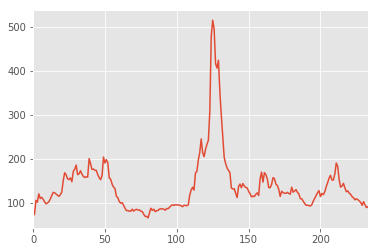

In [71]:
#fig, ax = plt.subplots()
#fig.set_size_inches(9, 6)
sns.tsplot(df_date.OAS,)
plt.show()

In [81]:
df.columns.values

array(['Date', 'Ticker', 'Sector', 'Industry', 'Cash From Operations',
       'Current Market Cap', 'EBITDA Margin', 'Free Cash Flow',
       'Gross Margin', 'Interest Expense', 'Long Term Debt', 'Net Debt',
       'Net Income/Net Profit (Losses)', 'Revenue',
       'Short and Long Term Debt', 'Total Assets',
       'Total Current Liabilities', 'Tobacco.Share.Price', 'Tobacco.OAS',
       'Tobacco.Share.Price.Vol.21', 'Tobacco.Share.Price.Vol.63',
       'Consumer.Products.Share.Price', 'Consumer.Products.OAS',
       'Consumer.Products.Share.Price.Vol.21',
       'Consumer.Products.Share.Price.Vol.63', 'Supermarkets.Share.Price',
       'Supermarkets.OAS', 'Supermarkets.Share.Price.Vol.21',
       'Supermarkets.Share.Price.Vol.63', 'Oil.Price', 'Oil.Price.Vol.21',
       'Oil.Price.Vol.63', 'Stock.Price', 'Shares.Outstanding', 'VXV',
       'SP.Index', 'SP.Dividend.Yield', 'TBill.Yield', 'TED.Rate',
       'Industrial.Production', 'Consumer.Sentiment', 'One.Month.Yield',
       'Three

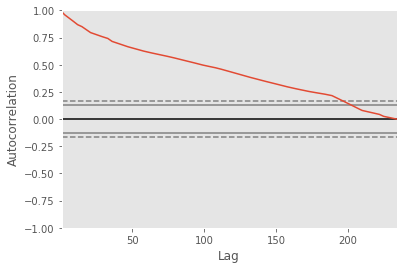

In [82]:
indicator = df.groupby('Date')['Date','Cash From Operations',
       'Current Market Cap', 'EBITDA Margin', 'Free Cash Flow',
       'Gross Margin', 'Interest Expense', 'Long Term Debt','Net Debt',
       'Net Income/Net Profit (Losses)', 'Revenue',
       'Short and Long Term Debt', 'Total Assets',
       'Total Current Liabilities'].mean().dropna()
pd.plotting.autocorrelation_plot(indicator)

In [83]:
indicator.corr()

,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,Long Term Debt,Net Debt,Net Income/Net Profit (Losses),Revenue,Short and Long Term Debt,Total Assets,Total Current Liabilities
Cash From Operations,1.000000,0.329535,-0.021281,0.875063,0.131458,0.410340,0.490470,0.190131,0.492233,0.498769,0.492725,0.478604,0.392039
Current Market Cap,0.329535,1.000000,0.424773,0.368421,0.742393,0.193982,0.633604,-0.184801,0.663959,0.033719,0.411500,0.226715,-0.027511
EBITDA Margin,-0.021281,0.424773,1.000000,0.060493,0.506129,-0.041820,0.132858,-0.158622,0.296548,-0.085725,0.019128,-0.016376,-0.112424
Free Cash Flow,0.875063,0.368421,0.060493,1.000000,0.300185,-0.010682,0.244872,-0.190990,0.655870,0.042819,0.139368,0.045194,-0.072314
Gross Margin,0.131458,0.742393,0.506129,0.300185,1.000000,-0.176338,0.280105,-0.592694,0.667811,-0.255549,-0.011860,-0.123301,-0.365078
Interest Expense,0.410340,0.193982,-0.041820,-0.010682,-0.176338,1.000000,0.786414,0.823932,-0.120658,0.911431,0.917110,0.946027,0.925228
Long Term Debt,0.490470,0.633604,0.132858,0.244872,0.280105,0.786414,1.000000,0.491688,0.260536,0.637046,0.935422,0.807228,0.617879
Net Debt,0.190131,-0.184801,-0.158622,-0.190990,-0.592694,0.823932,0.491688,1.000000,-0.423693,0.758482,0.719532,0.752871,0.844763
Net Income/Net Profit (Losses),0.492233,0.663959,0.296548,0.655870,0.667811,-0.120658,0.260536,-0.423693,1.000000,-0.142692,0.078648,-0.054610,-0.251942
Revenue,0.498769,0.033719,-0.085725,0.042819,-0.255549,0.911431,0.637046,0.758482,-0.142692,1.000000,0.826248,0.960069,0.981417


In [84]:
indicator.diff().corr()

,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,Long Term Debt,Net Debt,Net Income/Net Profit (Losses),Revenue,Short and Long Term Debt,Total Assets,Total Current Liabilities
Cash From Operations,1.000000,0.034044,-0.152249,0.942574,-0.260767,0.393286,0.419029,0.348871,0.323773,0.570694,0.458573,0.470662,0.488398
Current Market Cap,0.034044,1.000000,0.071906,0.006161,0.258704,0.130391,0.115903,0.010405,-0.017370,0.144273,0.119155,0.137006,0.130989
EBITDA Margin,-0.152249,0.071906,1.000000,-0.103717,0.364498,-0.065114,-0.030053,-0.007425,-0.045723,-0.066763,-0.025023,-0.030865,-0.036522
Free Cash Flow,0.942574,0.006161,-0.103717,1.000000,-0.227013,0.107174,0.146080,0.129826,0.483132,0.312177,0.189513,0.198551,0.216714
Gross Margin,-0.260767,0.258704,0.364498,-0.227013,1.000000,-0.101200,-0.131750,-0.265005,-0.016241,-0.150327,-0.174671,-0.141816,-0.143038
Interest Expense,0.393286,0.130391,-0.065114,0.107174,-0.101200,1.000000,0.966877,0.843232,-0.305666,0.960286,0.966116,0.977005,0.975035
Long Term Debt,0.419029,0.115903,-0.030053,0.146080,-0.131750,0.966877,1.000000,0.856892,-0.255456,0.962105,0.979458,0.978701,0.969017
Net Debt,0.348871,0.010405,-0.007425,0.129826,-0.265005,0.843232,0.856892,1.000000,-0.072405,0.818523,0.894715,0.842638,0.839545
Net Income/Net Profit (Losses),0.323773,-0.017370,-0.045723,0.483132,-0.016241,-0.305666,-0.255456,-0.072405,1.000000,-0.206034,-0.248038,-0.296479,-0.287950
Revenue,0.570694,0.144273,-0.066763,0.312177,-0.150327,0.960286,0.962105,0.818523,-0.206034,1.000000,0.964824,0.988186,0.988715


In [36]:
df['Consumer.Sentiment'].describe()

count    35064.000000
mean        85.718064
std         12.527425
min         55.300000
25%         76.200000
50%         87.700000
75%         94.400000
max        112.000000
Name: Consumer.Sentiment, dtype: float64

In [37]:
df['Industrial.Production'].describe()

count    35064.000000
mean        98.579249
std          5.136947
min         86.841400
25%         94.171700
50%         99.903600
75%        102.836100
max        106.663000
Name: Industrial.Production, dtype: float64